In [8]:
import sys

sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')


import arepo_package
import scipy.interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_ids_to_tracked(z_current,N,p_type):
    p_id_latest_z,output_redshift=arepo_package.get_particle_property(basePath,'ParticleIDs',p_type,z_current)
    bh_mass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',p_type,z_current)  
    indices=numpy.argsort(bh_mass)[-N:]
    p_ids_to_be_tracked=p_id_latest_z[indices]   
    return p_ids_to_be_tracked#,bh_mass[indices]-(numpy.sort(bh_mass))[-N:]

basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'


p_ids_to_be_tracked=get_ids_to_tracked(0.06,109,5)


Desired redshift:  0.06
Output redshift:  0.09940180263022191
Output snapshot:  18
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  0.06
Output redshift:  0.09940180263022191
Output snapshot:  18
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'Subfi

In [10]:
basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

def make_image(desired_id):
    BH_ids_for_id,scale_factors_for_id,BH_masses_for_id,BH_mdots_for_id,rhos_for_id,sound_speeds_for_id,merging_times=arepo_package.get_blackhole_history_high_res_all_progenitors(basePath,desired_id)

    z_latest=0
    z_earliest=8
    z_no_of_bins=100
    p_type=5
    p_id_to_be_tracked=desired_id
    desired_property='BH_Mass'
    bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)


    
    redshifts_for_id=1./scale_factors_for_id-1
    f,ax=plt.subplots(1,1,figsize=(10,8))

    for times in merging_times:
        ax.axvline(1./times-1,color='black',alpha=0.5)
    
    ax.errorbar(redshifts_for_id,BH_masses_for_id*1e10,marker='o',linestyle=' ',color='blue',ms=2)
    extract_main=desired_id==BH_ids_for_id
    ax.errorbar(redshifts_for_id[extract_main],BH_masses_for_id[extract_main]*1e10,marker='o',linestyle=' ',color='black')

    ax.plot(z_history,bhmass_history*1e10,marker='o',color='red',ms=20)
    
    print(z_history)



    ax.set_xlabel('$z$',fontsize=40)

    ax.set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

    ax.set_yscale('log')
    ax.tick_params(labelsize=40)


[0.0994018  0.19728418 0.19728418]


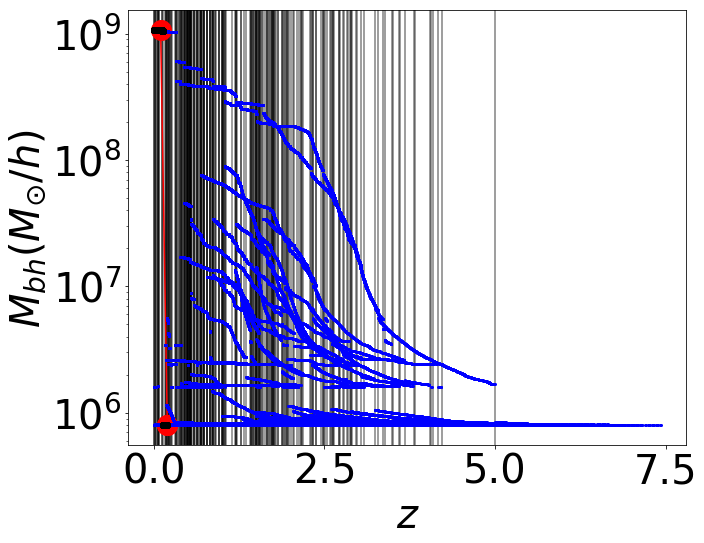

In [11]:
desired_id=p_ids_to_be_tracked[-1]
make_image(desired_id)

[0.0994018  0.19728418 0.19728418 0.29771768]


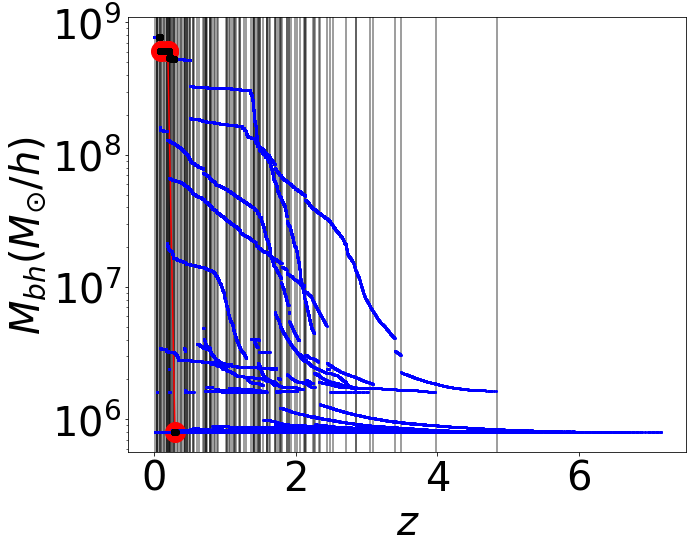

In [12]:
desired_id=p_ids_to_be_tracked[-2]
make_image(desired_id)

[2.22044605e-16 9.94018026e-02]


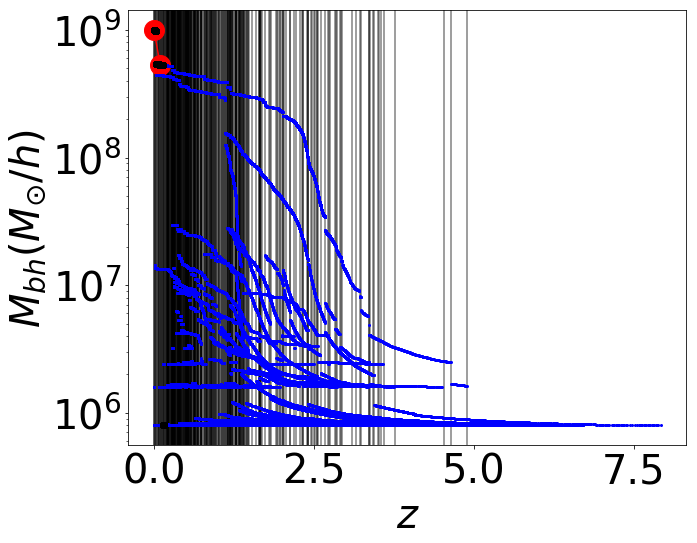

In [13]:
desired_id=p_ids_to_be_tracked[-3]
make_image(desired_id)

[0.0994018  0.19728418 0.19728418 0.29771768 0.39992696 0.49949078
 0.49949078 0.69608331 0.69608331 0.69608331 0.99729423 0.99729423
 0.99729423 0.99729423 0.99729423 1.49551217 1.49551217 1.49551217
 1.49551217 1.49551217 1.49551217 1.98783724 1.98783724 1.98783724
 1.98783724 1.98783724 1.98783724 1.98783724 1.98783724 1.98783724]


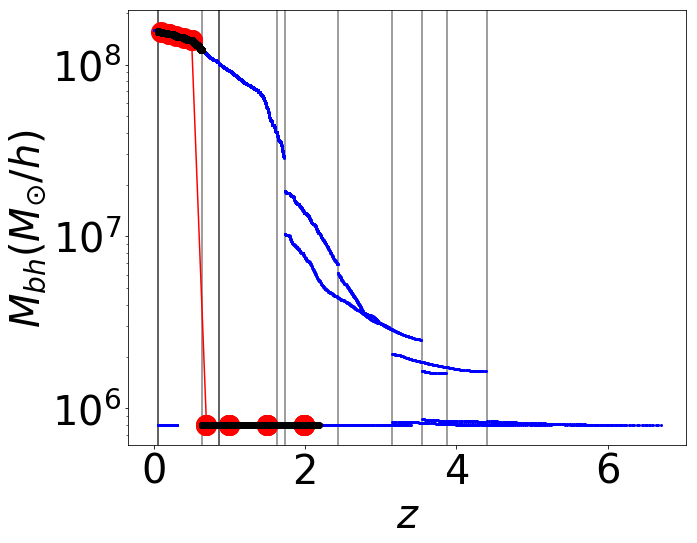

In [14]:
desired_id=p_ids_to_be_tracked[-20]
make_image(desired_id)

[2.22044605e-16 9.94018026e-02 1.97284182e-01 1.97284182e-01
 2.97717685e-01 3.99926965e-01 4.99490785e-01 4.99490785e-01
 6.96083305e-01 6.96083305e-01 6.96083305e-01 9.97294226e-01
 9.97294226e-01 9.97294226e-01 9.97294226e-01 9.97294226e-01]


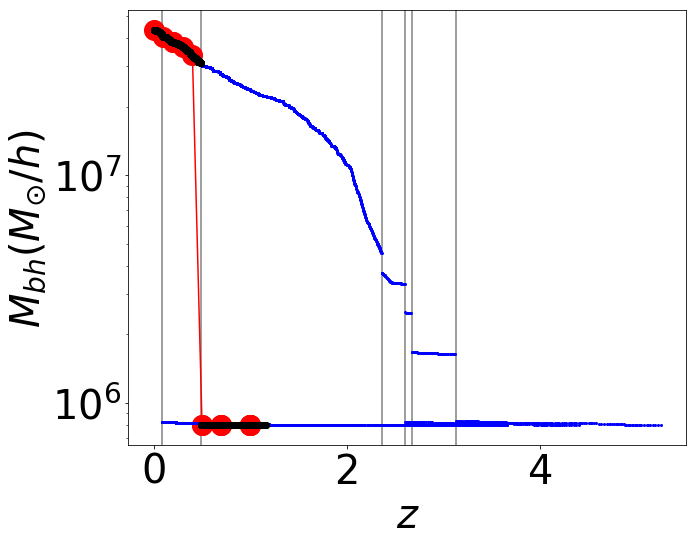

In [15]:
desired_id=p_ids_to_be_tracked[-50]
make_image(desired_id)

In [16]:
p_ids_to_be_tracked=get_ids_to_tracked(3.,109,5)

Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml

[2.98918422 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422
 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422
 2.98918422]


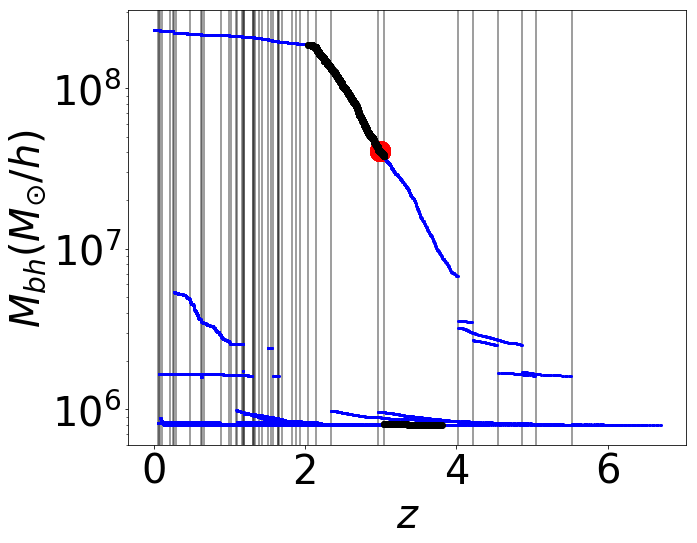

In [17]:
desired_id=p_ids_to_be_tracked[-1]
make_image(desired_id)

[1.98783724 1.98783724 1.98783724 1.98783724 1.98783724 1.98783724
 1.98783724 1.98783724 1.98783724 2.98918422 2.98918422 2.98918422
 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422
 2.98918422 2.98918422 2.98918422 2.98918422 3.98427204 3.98427204
 3.98427204 3.98427204 3.98427204 3.98427204 3.98427204 3.98427204
 3.98427204 3.98427204 3.98427204 3.98427204]


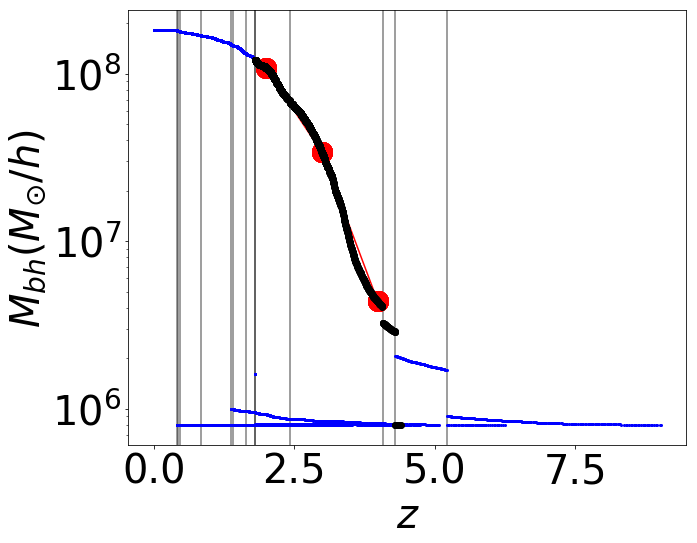

In [18]:
desired_id=p_ids_to_be_tracked[-3]
make_image(desired_id)

[1.49551217 1.49551217 1.49551217 1.49551217 1.49551217 1.49551217
 1.98783724 1.98783724 1.98783724 1.98783724 1.98783724 1.98783724
 1.98783724 1.98783724 1.98783724 2.98918422 2.98918422 2.98918422
 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422 2.98918422
 2.98918422 2.98918422 2.98918422 2.98918422]


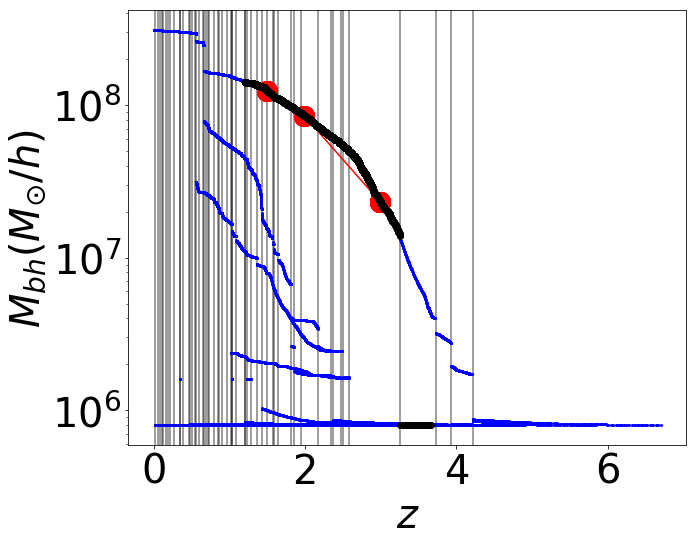

In [19]:
desired_id=p_ids_to_be_tracked[-5]
make_image(desired_id)